# Observations:


1.   Note: ALBUM_type can be removed from dataset since all items are 'album'    #len(pd.unique(df['ALBUM_type']))
2.   There is only one playlist with a single artist in our dataset creating
3.   Sum of Track count in each playlist not matching with the total no. of tracks. Edit: Using TRACK_uri works instead of TRACK_name i.e. there are some TRACK_name items with same names but different uri

# Importing Libraries & Reading Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('merged_playlist_without_duplicates_0_999.csv')

# Analysing Playlist Popularity vs Track features

In [2]:
def analyse_playlist_popularity(df = df, k = 3):
    '''
    Assigns the median of track popularities per playlist as the playlist popularity, computes the correlation between playlist popularity
    and each track feature. It also generates a correlation heatmap for playlist popularity v/s track features. Additional functionality of
    analysing only top k playlists with highest playlist popularity is presented by the fucntion.

    Parameters
    ----------
    df : A DataFrame
        The default is df.
    k : An integer
        The default is 3.

    Returns
    -------
        A correlation heatmap between each track feature v/s playlist popularity.

    '''
    assert isinstance(df, pd.DataFrame), 'Invalid input for df; must be a DataFrame'
    assert isinstance(k, int) and k > 0, 'Invalid input for k; must be a positive integer'

    # Assigning a popularity value for each playlist as the median of the track popularities within each playlist
    popularity_per_playlist = df.groupby('PLAYLIST_id')['POPULARITY'].median()

    # Extracting top k playlists with highest playlist popularity values
    top_k_playlist_popularities = popularity_per_playlist.nlargest(k)

    # Getting the playlist ids of the top k popular playlists
    top_k_popular_playlists = top_k_playlist_popularities.index.to_list()

    # Creating a DataFrame (popularity_per_playlist) with column PLAYLIST_popularity and transforming DataFrame to replicate values based on the number of tracks per playlist to match the size of the original DataFrame
    popularity_per_playlist = pd.DataFrame(df.groupby('PLAYLIST_id')['POPULARITY'].median())
    popularity_per_playlist.rename(columns = {'POPULARITY':'PLAYLIST_POPULARITY'}, inplace = True)
    popularity_per_playlist = popularity_per_playlist.loc[popularity_per_playlist.index.repeat(df.groupby('PLAYLIST_id')['TRACK_uri'].count())].reset_index(drop=True)

    # Appending the PLAYLIST_popularity column to the original DataFrame
    if 'PLAYLIST_POPULARITY' in df.columns:
        pass
    else:
        df.insert(df.shape[1], 'PLAYLIST_POPULARITY', popularity_per_playlist, allow_duplicates = False)

    # Filtering features from dataframe corresponding to playlist ids of top k popular playlists
    df_filtered = df[df['PLAYLIST_id'].isin(top_k_popular_playlists)]
    df_filtered = df_filtered[['DURATION_ms', 'DANCEABILITY', 'ACOUSTICNESS', 'ENERGY', 'INSTRUMENTALNESS', 'VALENCE', 'TEMPO', 'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS', 'PLAYLIST_POPULARITY']]

    # Calculating correlation of each track feature with popularity for the top k popular playlists
    features_correlation_with_popularity = df_filtered.corr()[['PLAYLIST_POPULARITY']].sort_values(by='PLAYLIST_POPULARITY', ascending=False)

    # Plotting the correlation heatmap of each track feature v/s playlist popularity
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(features_correlation_with_popularity, vmin=-1, vmax=1, annot=True, center=True)
    heatmap.set_title('Correlation Heatmap for Playlist Popularity v/s Track features', fontdict={'fontsize':12}, pad=12);
    return heatmap

# Analysing Number of Songs per playlist vs Track features

In [3]:
def analyse_track_count_per_playlist(df = df, k = 3):
    '''
    Counts the number of tracks per playlists, computes the correlation between number of tracks per playlist and each track feature.
    It also generates a correlation heatmap for number of tracks per playlist v/s track features. Additional functionality of analysing
    only top k playlists with most songs is presented by the fucntion.
    playlists.

    Parameters
    ----------
    df : A DataFrame
        The default is df.
    k : An integer
        The default is 3.

    Returns
    -------
        A correlation heatmap between each track feature v/s number of songs per playlist.
    '''
    assert isinstance(df, pd.DataFrame), 'Invalid input for df; must be a DataFrame'
    assert isinstance(k, int) and k > 0, 'Invalid input for k; must be a positive integer'

    # Calculating the number of tracks per playlist
    tracks_per_playlist = df.groupby('PLAYLIST_id')['TRACK_uri'].count()

    # Extracting top k playlist with most songs
    top_k_playlist_with_most_songs = tracks_per_playlist.nlargest(k)

    # Getting the playlist ids of the top k playlists with most songs
    top_k_playlist_ids_with_most_songs = top_k_playlist_with_most_songs.index.to_list()

    # Creating a DataFrame (tracks_per_playlist) with column TRACK_count per playlist and transforming DataFrame to replicate values based on their own value to match the size of the original DataFrame
    tracks_per_playlist = pd.DataFrame(tracks_per_playlist)
    tracks_per_playlist.rename(columns = {'TRACK_uri':'TRACK_count'}, inplace = True)
    tracks_per_playlist = tracks_per_playlist.loc[tracks_per_playlist.index.repeat(tracks_per_playlist['TRACK_count'])].reset_index(drop=True)

    # Appending the TRACK_count column to the original DataFrame
    if 'TRACK_count' in df.columns:
        pass
    else:
        df.insert(df.shape[1], 'TRACK_count', tracks_per_playlist, allow_duplicates = False)

    # Filtering features from dataframe corresponding to playlist ids of top k playlists with most songs
    df_filtered = df[df['PLAYLIST_id'].isin(top_k_playlist_ids_with_most_songs)]
    df_filtered = df_filtered[['DURATION_ms', 'DANCEABILITY', 'ACOUSTICNESS', 'ENERGY', 'INSTRUMENTALNESS', 'VALENCE', 'TEMPO', 'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS', 'TRACK_count']]

    # Calculating correlation of each track feature with count of songs for the top k playlists with most songs
    features_correlation_with_num_songs_per_playlist = df_filtered.corr()[['TRACK_count']].sort_values(by='TRACK_count', ascending=False)

    # Plotting the correlation heatmap of each track feature v/s track count per playlist
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(features_correlation_with_num_songs_per_playlist, vmin=-1, vmax=1, annot=True, center=True)
    heatmap.set_title('Correlation Heatmap for Number of Tracks per playlist v/s Track features', fontdict={'fontsize':12}, pad=12);
    return heatmap

# Final Check

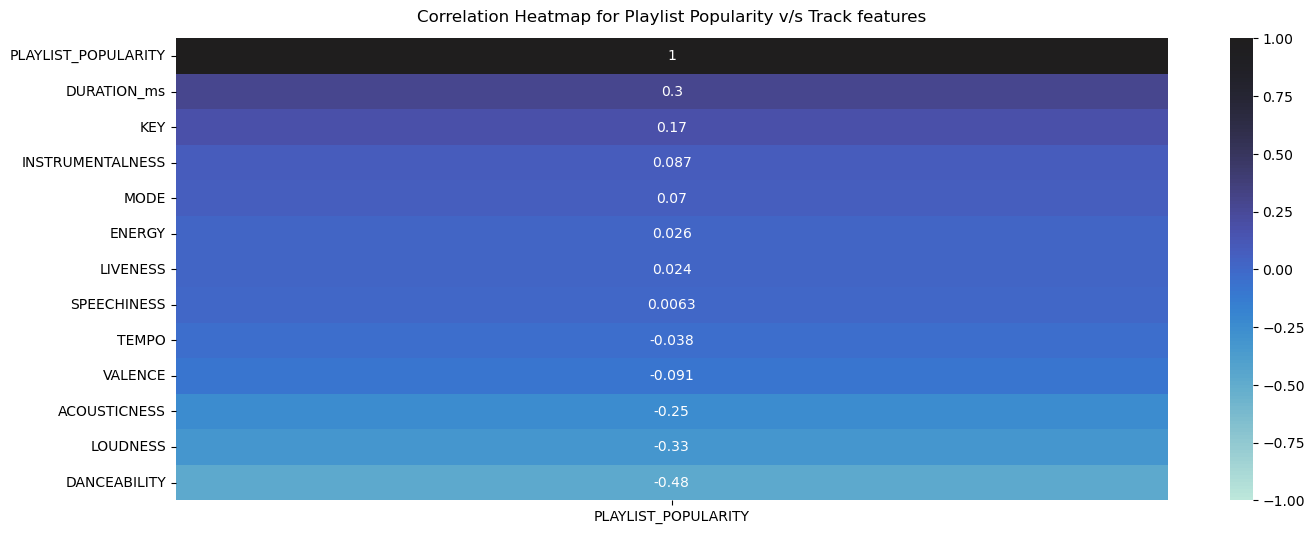

In [4]:
a = analyse_playlist_popularity(df, k = 3)

<Axes: title={'center': 'Correlation Heatmap for Number of Tracks per playlist v/s Track features'}>

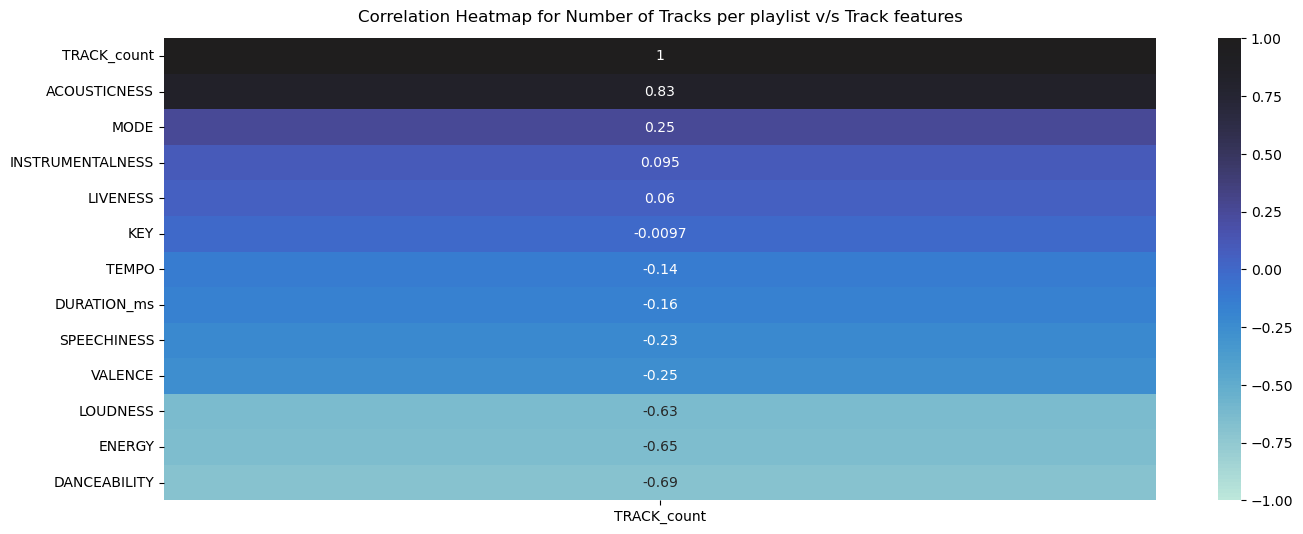

In [5]:
analyse_track_count_per_playlist(df, k = 3)

# Artists per playlist analysis

In [6]:
# artists_per_playlist = df.groupby('PLAYLIST_id')['ARTIST_names'].nunique()
# artists_per_playlist.sort_values()

In [7]:
# playlists_with_single_artist = artists_per_playlist[artists_per_playlist == 1]
# playlists_with_single_artist

# Function 1 & 2 analysis

In [8]:
# popularity_per_playlist = pd.DataFrame(df.groupby('PLAYLIST_id')['POPULARITY'].median())
# popularity_per_playlist.rename(columns = {'POPULARITY':'PLAYLIST_popularity'}, inplace = True)
# popularity_per_playlist = popularity_per_playlist.loc[popularity_per_playlist.index.repeat(df.groupby('PLAYLIST_id')['TRACK_uri'].count())].reset_index(drop=True)
# popularity_per_playlist

# tracks_per_playlist = pd.DataFrame(df.groupby('PLAYLIST_id')['TRACK_uri'].count())
# tracks_per_playlist.rename(columns = {'TRACK_uri':'TRACK_count'}, inplace = True)
# tracks_per_playlist = tracks_per_playlist.loc[tracks_per_playlist.index.repeat(tracks_per_playlist['TRACK_count'])].reset_index(drop=True)
# tracks_per_playlist

# print(tracks_per_playlist['TRACK_count'].sum())
# print(df1.index[df1['TRACK_count'] == 51].tolist())
# tracks_per_playlist['TRACK_count'].value_counts()[45]